In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("data/attacks.csv", encoding = 'ISO-8859-1', dtype=object)
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.drop(['Case Number', 'Date', 'Name', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2','original order','Unnamed: 22','Unnamed: 23' ], axis=1, inplace=True)

In [4]:
data.describe()

,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
count,6300,6298,6252,5847,5762,5758,5737,3471,6274,5763,2948,3464
unique,250,8,212,825,4108,1532,6,157,3737,8,366,1549
top,2015,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,17,FATAL,N,Afternoon,White shark
freq,141,4595,2229,1037,163,971,5094,154,802,4293,187,163


In [5]:
data

,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Remover os valores NaN e converter para int, tratando valores não válidos
data['Year'] = pd.to_numeric(data['Year'], errors='coerce', downcast='integer')

In [7]:
# Remover os valores NaN após a conversão
data = data.dropna(subset=['Year'])

In [8]:
data


,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...
6297,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,FATAL,Y,NaN,NaN
6298,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y,NaN,NaN
6299,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y,NaN,NaN
6300,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y,NaN,NaN


In [9]:
# Remover os valores NaN após a conversão
data = data.dropna(subset=['Year'])

In [10]:
# Filtrar os dados para o período de 2015 a 2018
filtered_data = data[(data['Year'] >= 2015) & (data['Year'] <= 2018)]


In [47]:
# Identificar a espécie com a maior frequência para cada ano
top_species_by_year = (
    filtered_data.groupby(['Year', 'Species '])
    .size()
    .reset_index(name='Count')
    .sort_values(['Year', 'Count'], ascending=[True, False])
    .drop_duplicates('Year')
)

top_species_by_year


,Year,Species,Count
55,2015.0,White shark,9
115,2016.0,White shark,8
166,2017.0,Tiger shark,5
210,2018.0,Tiger shark,4


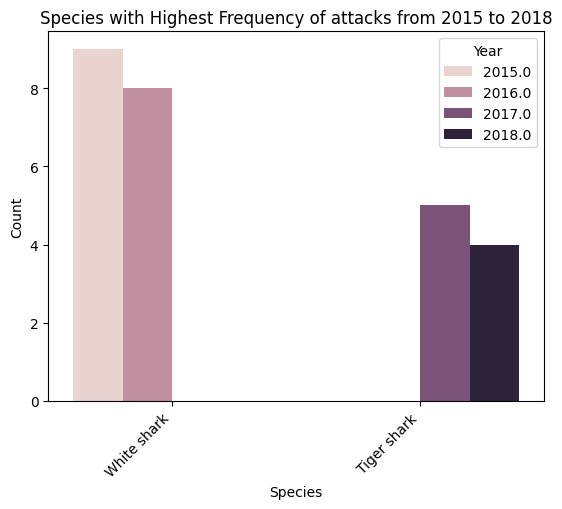

In [51]:

# Criar um gráfico de barras
barplot = sns.barplot(x="Species ", y="Count", hue="Year", data=top_species_by_year)

# Adicionar rótulos e título
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species with Highest Frequency of attacks from 2015 to 2018')

# Rotacionar rótulos do eixo x para melhor visualização (opcional)
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.show()